### GradientBoostingMachine

### GBM
    Decision Tree --> Ensemble 알고리즘
    1) Bagging 알고리즘 --> RandomForest Machine
    2) Boosting 알고리즘 --> GradientBoosting Machine

    Boosting 알고리즘의 대표적인 구현에는 GradientBoosting이 있다.
    모델을 학습-예측하면서 잘못예측한 데이타에 가중치 부여를 통해서 
    오류를 개선해 나가면서 학습하는 방식이다. 
    이때 가중치를 업데이트 하는 방법으로 경사하강법(Gradient Descent)를 이용한다.

    결정트리 방식보다 GradientBoosting이방식이 더 고도화 되어지고 좋아진 반면에
    각 모델에서 사용할수 있는 hyperparameter들도 늘어난다.
    
    결과적으로 이 모델 학습방식은 hyperparameter에 따라서 성능에 큰 차이를 보인다.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [6]:
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [16]:
#1.훈련 세트 정확도 1이 나옴...일반화, 가지치기
#2. Boosting 기법 중에서 가장 중요한 하이퍼파라미터...learning_rate 값 부여

#gbm = GradientBoostingClassifier(random_state=0) 1.0 / 0.965
#gbm = GradientBoostingClassifier(random_state=0, max_depth=1) 0.991 / 0.972
#gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.01) 0.988 / 0.965
gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=1)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=0)

In [17]:
train_score = gbm.score(X_train,y_train)
test_score = gbm.score(X_test,y_test)

print('훈련세트 정확도 : {:.3f}'.format(train_score))
print('테스트세트 정확도 : {:.3f}'.format(test_score))

훈련세트 정확도 : 0.927
테스트세트 정확도 : 0.958


### 특성 중요도 시각화

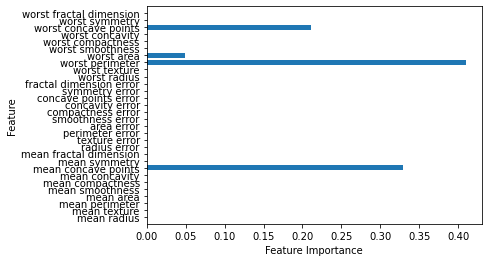

In [18]:
# 특성 중요도 시각화하기
def plot_feature_importances_cancer(gbrt):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), gbrt.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)



plot_feature_importances_cancer(gbm)

# 정리하기
GBM 사용 시 필수 파라미터

max_depth
n_estimators
learning_rate
n_jobs

--> 파라미터가 3개 넘어가면 교차검증이 필요하다...

### Grid Search
    Grid Search 알고리즘은 우리가 지정해준 몇가지 잠재적인 Parameter
    후보군 조합 중에서 가장Best 조합을 찾아내는ㄴ 교차점증 알고리즘이다.
    
    우리가 직접 하나하나 값들을 대입해 가면서 Loss가 가장 낮게 나오는 파라미터의 조합을 찾아야 하는데 이걸 대신해준다고 생각하면 된다.
    
    SKlearn 패키지에서 제공하는 라이브러리를 임포트만 하며 되기 때문에 상대적으로 손쉬운 방법이다. (Model_selection 서브 모듈 안에 있음)
    
    단점은 최적의 조합을 찾기까지 시간이 오래 걸린다는 점이 있다.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# 1. 하이퍼파라미터의 조합을 일단 딕셔너리 형태로 생성

param_grid = {
    'n_estimators':[100,50,200,250],
    'max_depth':[4,6,9],
    'learning_rate':[0.1, 0.01, 0.001]
}

In [25]:
# 2. 우리가 적용할 모델을 생성

gmodel = GradientBoostingClassifier()

In [29]:
# 3. GridSearch를 실행 :1) 모델과 파라미터를 가진 GridSearchCV 생성 +2)GridSearchCV 학습
grid_search = GridSearchCV(
                            gmodel,
                            param_grid=param_grid,
                            n_jobs=-1,
                            verbose=1
                            )

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   58.4s finished


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 6, 9],
                         'n_estimators': [100, 50, 200, 250]},
             verbose=1)

In [30]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

### Best Parameter를 이용해서 GBM 생성

In [33]:
gbm = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators= 250)
gbm.fit(X_train,y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=250)

In [34]:
train_score = gbm.score(X_train,y_train)
test_score = gbm.score(X_test,y_test)

print('훈련세트 정확도 : {:.3f}'.format(train_score))
print('테스트세트 정확도 : {:.3f}'.format(test_score))

훈련세트 정확도 : 1.000
테스트세트 정확도 : 0.965
